In [0]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
#importando as bibliotecas 
import pylab as pl # utilizado para plotar os gráficos
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#importando os dados como um dataframe
df_wine=pd.read_csv('winequality-red.csv', sep=';')

**Conhecendo o Dataset**

In [0]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
# Correlação de Pearson
df_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [0]:
# Quantidade de instâncias para cada uma das diferentes instâncias do target
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
# Visualizando as colunas do dataset
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Normalizando os dados**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
#scaler = MinMaxScaler() #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
x = df_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
dataset = scaler.fit_transform(x) # aplica a escala
df_wine_normal = pd.DataFrame(dataset) # Dataset normalizado somente com as features
print(dataset)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [0]:
df_wine_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1599 non-null   float64
 1   1       1599 non-null   float64
 2   2       1599 non-null   float64
 3   3       1599 non-null   float64
 4   4       1599 non-null   float64
 5   5       1599 non-null   float64
 6   6       1599 non-null   float64
 7   7       1599 non-null   float64
 8   8       1599 non-null   float64
 9   9       1599 non-null   float64
 10  10      1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [0]:
df_wine_normal[0].min()

0.0

**Definindo as entradas e saída**

In [0]:
#transforma os dados em array
X = df_wine_normal.iloc[:, :].values  #dados de entrada
y = df_wine.iloc[:, 11].values  # saídas ou target

**Dividindo dados de treinamento e teste**

In [0]:
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)# divide 30% para teste

**Algoritmo KNN**

In [0]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [0]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1   0   1   0   0   0]
 [  0   1  14   5   1   0]
 [  0   0 148  54   5   0]
 [  0   1  71 102  21   0]
 [  0   1   9  23  19   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


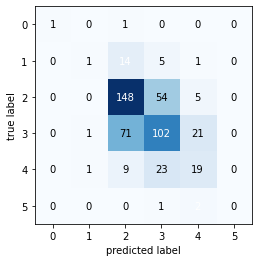

In [0]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.5645833333333333


**Algoritmo Árvore de Decisão**

In [0]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [0]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.5979166666666667


**Algoritmo Floresta Randômica**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Realiza o treinamento do classificador
clf = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.6791666666666667


**Algoritmo SVM**

In [0]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [0]:
#cria o objeto SVM
clf_svm = SVC(gamma='auto', kernel='rbf')  #escolhe o 

#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_svm.predict(X_test)

In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.5854166666666667


**Algoritmo Rede MLP**

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza a classificação via SVM
clf_mlp.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.6


**Classificação dos vinhos - 1(bom) e 0(ruim)**

In [0]:
y_bin = pd.DataFrame(df_wine.iloc[:, 11].values)  # saídas ou target

In [0]:
y_bin.loc[y_bin[0] > 5, 'quality_bin'] = 1 
y_bin.loc[y_bin[0] <= 5, 'quality_bin'] = 0 

In [0]:
#df_wine.loc[df_wine['quality'] > 5, 'quality_bin'] = 1 
#df_wine.loc[df_wine['quality'] <= 5, 'quality_bin'] = 0 

AttributeError: ignored

In [0]:
y_bin.drop([0], axis=1, inplace=True)

In [0]:
print(df_wine)

      fixed acidity  volatile acidity  ...  quality  quality_bin
0               7.4             0.700  ...        5          0.0
1               7.8             0.880  ...        5          0.0
2               7.8             0.760  ...        5          0.0
3              11.2             0.280  ...        6          1.0
4               7.4             0.700  ...        5          0.0
...             ...               ...  ...      ...          ...
1594            6.2             0.600  ...        5          0.0
1595            5.9             0.550  ...        6          1.0
1596            6.3             0.510  ...        6          1.0
1597            5.9             0.645  ...        5          0.0
1598            6.0             0.310  ...        6          1.0

[1599 rows x 13 columns]


**Aplicando modelo de Floresta Randômica para a classificação dos vinhos**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

y = y_bin.iloc[:,:].values  # saídas ou target

from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.30, random_state=1)# divide 30% para teste

# Realiza o treinamento do classificador
clf = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [0]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Acurácia do modelo:  0.8041666666666667
